In [1]:
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

jax.config.update("jax_enable_x64", True)

from parsmooth import MVNStandard
from parsmooth import FunctionalModel
from parsmooth.sequential._filtering import filtering
from parsmooth.linearization import extended, extended_hessian
from parsmooth.sequential._filtering_Newton import filtering as newton_filtering

In [2]:
def dynamic_model(xk):
    return jnp.tanh(xk)
def measurement_model(xk):
    return jnp.sin(xk)

In [9]:
# Get data
T = 100
xs = np.zeros((T, 1))
ys = np.zeros((T, 1))
sigma = 0.1
x0 = np.random.normal(loc=0, scale=1)
x = x0
xs[0] = x
for k in range(T):
    q = np.random.normal(loc=0, scale=sigma)
    r = np.random.normal(loc=0, scale=sigma)
    x = dynamic_model(x) + q
    y = measurement_model(x) + r
    xs[k] = x
    ys[k] = y

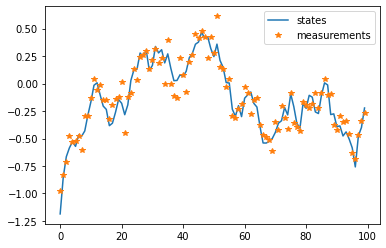

In [4]:
plt.figure()
plt.plot(xs)
plt.plot(ys, '*')
plt.legend(['states', 'measurements']);

In [5]:
Q = jnp.array([[sigma**2]])
R = jnp.array([[sigma**2]])

transition_model = FunctionalModel(partial(dynamic_model), MVNStandard(jnp.zeros((1,)), Q))
observation_model = FunctionalModel(partial(measurement_model), MVNStandard(jnp.zeros((1,)), R))

In [10]:
# Filtering - Gauss-Newton
m0 = jnp.array([-1.])
P0 = jnp.eye(1)
init = MVNStandard(m0, P0)

xf = filtering(ys, init, transition_model, observation_model, extended, None)


In [11]:
# Filtering - Newton
filtered_states_newton = newton_filtering(ys, init, transition_model, observation_model, extended_hessian, None)

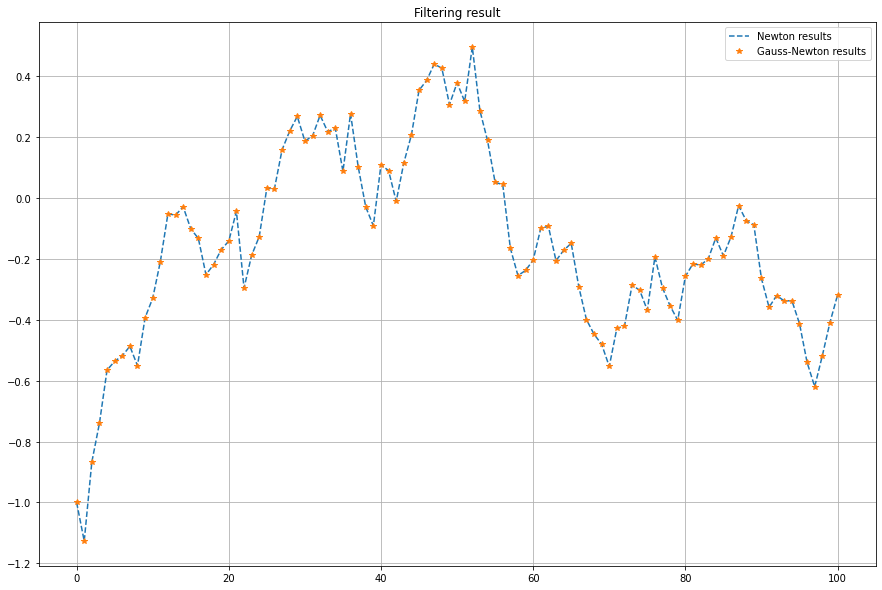

In [12]:
plt.figure(figsize=(15,10))
plt.plot(filtered_states_newton.mean, "--", label="Newton results" )
plt.plot(xf.mean, "*", label = "Gauss-Newton results")
plt.title("Filtering result")
plt.grid()
plt.legend();